In [21]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def plot_threshold_results(data):
    colors = sns.color_palette("husl", 3)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    thresholds = [float(t) for t in data.keys()]
    f1s = [d['f1'] for d in data.values()]
    recalls = [d['recall'] for d in data.values()]
    precisions = [d['precision'] for d in data.values()]

    data = {
        "F1": f1s,
        "Recall": recalls,
        "Precision": precisions,
    }

    for i, (label, scores) in enumerate(data.items()):
        # Plot the losses
        ax.plot(thresholds, scores, color=colors[i], marker='o', label=label)
        ax.set_title('Loss per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.set_xticks(thresholds)
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Find the first threshold where the precision is above 0.9
    threshold_index = next((i for i, precision in enumerate(precisions) if precision > 0.9), None)
    if threshold_index is not None:
        threshold = thresholds[threshold_index]
        ax.axvline(threshold, color='black', linestyle='--')
        ax.text(threshold + 0.01, 0.8, f"Threshold = {threshold:.2f}", fontsize=12)

    ax.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [44]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/blank/checkpoints/converted/epoch=0-step=2981_threshold_results.json'
with open(json_path, 'r') as f:
    data = json.load(f)

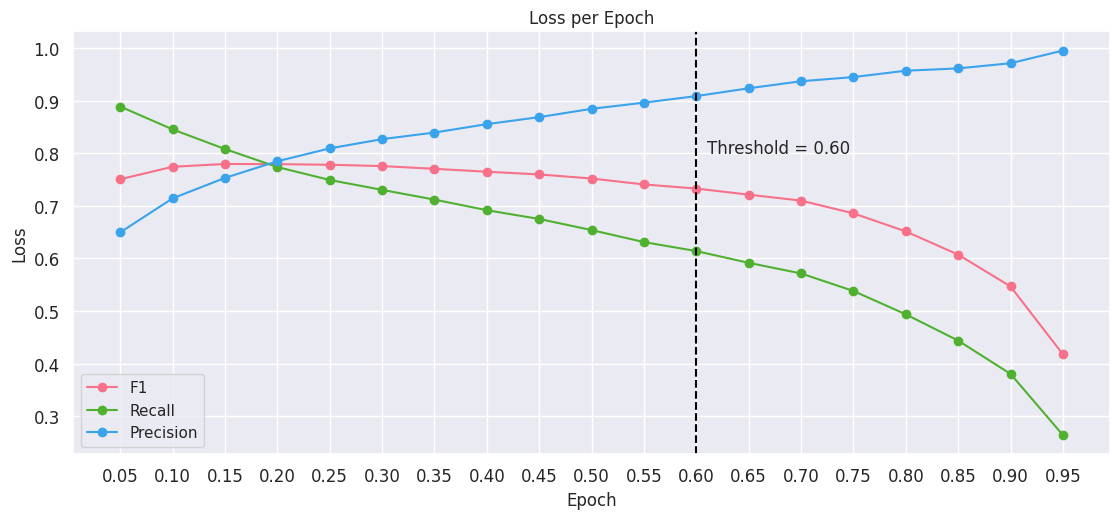

In [45]:
plot_threshold_results(data)